# Text Representation Methods

## Objective
In this lab, you will:
- Work on a **real dataset** (IMDB Reviews).
- Apply **text preprocessing**.
- Experiment with different **Text Representation methods**:
  - Bag of Words
  - N-grams
  - TF-IDF
  - Word2Vec
- **Compare their performance** using a simple classifier.

---

## 1. Load Dataset
```python
!pip install datasets scikit-learn gensim nltk


In [2]:
pip install datasets scikit-learn gensim nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 17.0 MB/s eta 0:00:00


In [3]:
pip install hf_xet

In [4]:
pip install "huggingface_hub[hf_xet]"

In [5]:
import re, nltk, numpy as np
from nltk.corpus import stopwords
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from gensim.models import Word2Vec
import pandas as pd
from sklearn.utils import shuffle

# ----------------------------
# 1. Load Data
# ----------------------------
dataset = load_dataset("imdb")

train_texts = list(dataset["train"]["text"])
train_labels = list(dataset["train"]["label"])

test_texts  = list(dataset["test"]["text"])
test_labels = list(dataset["test"]["label"])

# shuffle normally
train_texts, train_labels = shuffle(train_texts, train_labels, random_state=42)
test_texts, test_labels   = shuffle(test_texts, test_labels, random_state=42)

# sample subset
train_texts = train_texts[:5000]
train_labels = train_labels[:5000]
test_texts = test_texts[:1000]
test_labels = test_labels[:1000]

# ----------------------------
# 2. Preprocessing
# ----------------------------
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = [t for t in text.split() if t not in stop_words]
    return " ".join(tokens)

train_texts = [preprocess(t) for t in train_texts]
test_texts  = [preprocess(t) for t in test_texts]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
train_texts[0]

'dumb dumb thoroughly uninteresting supposed black comedy essentially starts chris klein trying maintain low profile eventually morphs uninspired version three amigos without laughs order black comedy work must outrageous play dead order black comedy work cannot mean spirited play dead play dead really town full nut jobs fred dunst however pretty fair imitation billy bob thorntons character simple plan jake busey pretty fair imitation well jake busey merk'

In [7]:
# A) Bag of Words
bow = CountVectorizer()
X_train_bow = bow.fit_transform(train_texts)
X_test_bow = bow.transform(test_texts)

In [8]:
X_train_bow[0]

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 52 stored elements and shape (1, 50441)>

In [9]:
print(X_train_bow[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 52 stored elements and shape (1, 50441)>
  Coords	Values
  (0, 13250)	2
  (0, 44899)	1
  (0, 47063)	1
  (0, 43543)	1
  (0, 4493)	3
  (0, 8527)	3
  (0, 14659)	1
  (0, 42376)	1
  (0, 7654)	1
  (0, 24449)	1
  (0, 46209)	1
  (0, 26757)	1
  (0, 26279)	1
  (0, 34751)	1
  (0, 14797)	1
  (0, 28995)	1
  (0, 47051)	1
  (0, 47850)	1
  (0, 44948)	1
  (0, 1402)	1
  (0, 49507)	1
  (0, 25087)	1
  (0, 31539)	2
  (0, 49676)	2
  (0, 29525)	1
  :	:
  (0, 10831)	3
  (0, 6429)	1
  (0, 27640)	1
  (0, 41913)	1
  (0, 36005)	1
  (0, 45643)	1
  (0, 17493)	1
  (0, 30785)	1
  (0, 23635)	1
  (0, 17246)	1
  (0, 13299)	1
  (0, 21214)	1
  (0, 34515)	2
  (0, 15484)	2
  (0, 21819)	2
  (0, 4372)	1
  (0, 4827)	1
  (0, 44897)	1
  (0, 7202)	1
  (0, 40513)	1
  (0, 33498)	1
  (0, 23333)	2
  (0, 6032)	2
  (0, 48849)	1
  (0, 27962)	1


In [10]:

# ----------------------------
# 3. Comparison Function
# ----------------------------
clf = LogisticRegression(max_iter=1000)
results = {} # Comparison for 4 types

# Bag of Words on LogisticRegression
clf.fit(X_train_bow, train_labels)

LogisticRegression(max_iter=1000)

In [11]:
x_test_labels_perd = clf.predict(X_test_bow)
print(f"Actual label: {test_labels[0]}, Pred:  {x_test_labels_perd[0]}  ")

Actual label: 0, Pred:  0  


In [12]:
 acc_bow = accuracy_score(test_labels,x_test_labels_perd )
 acc_bow

0.836

In [13]:
results = {}

In [14]:
results["Bag of Words"] = acc_bow
results

{'Bag of Words': 0.836}

In [15]:
# B) N-grams
ngram = CountVectorizer(ngram_range=(1,2))
X_train = ngram.fit_transform(train_texts)
X_test = ngram.transform(test_texts)
clf.fit(X_train, train_labels)
results["N-grams (1,2)"] = accuracy_score(test_labels, clf.predict(X_test))
results

{'Bag of Words': 0.836, 'N-grams (1,2)': 0.856}

In [16]:

# C) TF-IDF
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(train_texts)
X_test = tfidf.transform(test_texts)
clf.fit(X_train, train_labels)
results["TF-IDF"] = accuracy_score(test_labels, clf.predict(X_test))
results

{'Bag of Words': 0.836, 'N-grams (1,2)': 0.856, 'TF-IDF': 0.852}

In [17]:
# ----------------------------
# 4. Show Results (Sorted)
# ----------------------------
df_results = pd.DataFrame(list(results.items()), columns=["Method", "Accuracy"])
df_results = df_results.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print(df_results)


          Method  Accuracy
0  N-grams (1,2)     0.856
1         TF-IDF     0.852
2   Bag of Words     0.836


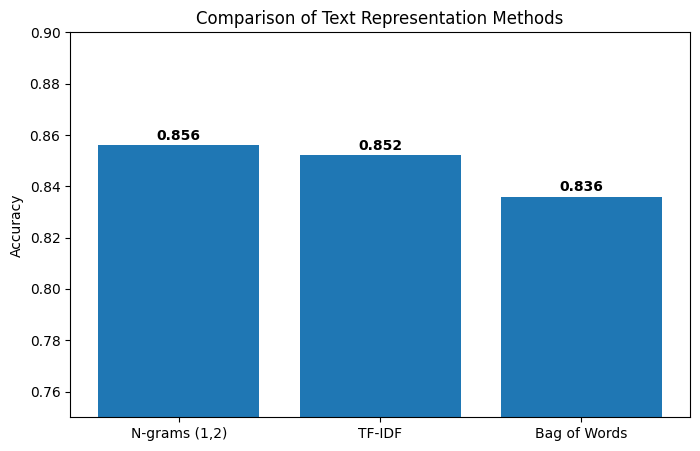

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(df_results["Method"], df_results["Accuracy"])
plt.title("Comparison of Text Representation Methods")
plt.ylabel("Accuracy")
plt.ylim(0.75, 0.90)
for i, v in enumerate(df_results["Accuracy"]):
    plt.text(i, v + 0.002, f"{v:.3f}", ha="center", fontweight="bold")
plt.show()

# Summary of Results (IMDB Sentiment Analysis)

## Key Findings

- **N-grams (1,2) – Accuracy: 0.856**
  - Captures context (e.g., "not good", "very bad").
  - Improves sentiment detection, especially for negations.
  - Downside: Larger vocabulary size → more memory and computation.

- **TF-IDF – Accuracy: 0.852**
  - Weighs words by importance (rare but informative words get higher weight).
  - Reduces the effect of frequent/common words (e.g., "movie", "film").
  - Balanced performance, often a strong choice for text classification.

- **Bag of Words – Accuracy: 0.836**
  - Simple frequency-based representation.
  - No weighting or context → weaker than TF-IDF.
  - Still provides a solid baseline with relatively good accuracy.

## Takeaways
- **Best performer**: N-grams (1,2) → great for sentiment tasks with negations.  
- **Most balanced & scalable**: TF-IDF → reliable in many NLP tasks.  
- **Baseline**: Bag of Words → simple, fast, but limited.  
